In [173]:
import numpy as np
import sympy as sym
from IPython.display import clear_output
import time
import matplotlib.pyplot as plt
from sympy import *

In [174]:
F = lambda x,y: ((x + y*1j)**3)-1

In [175]:
x0 = np.zeros(2) #inicial
x1 = np.zeros(2)
x2 = np.zeros(2)

x0[0]= (-1/2) 
x0[1]= (np.sqrt(3)/2)

x1[0] = (-1/2) 
x1[1] = -(np.sqrt(3)/2)

x2[0] = 1
x2[1] = 0

In [176]:
x = sym.Symbol('x',real=True)
y = sym.Symbol('y',real=True)
z = x + sym.I*y

f0 = (z**3)-1
F = np.array([sym.re(f0),sym.im(f0)])
F

array([x**3 - 3*x*y**2 - 1, 3*x**2*y - y**3], dtype=object)

In [177]:
DF1 = []
DF2 = []
a = sym.diff(F[0],x)
b = sym.diff(F[0],y)
DF1.append(a)
DF1.append(b)

c = sym.diff(F[1],x)
d = sym.diff(F[1],y)
DF2.append(c)
DF2.append(d)

J = [DF1,DF2]
J

[[3*x**2 - 3*y**2, -6*x*y], [6*x*y, 3*x**2 - 3*y**2]]

In [178]:
Fn = sym.lambdify([x,y],F,'numpy')
Jn = sym.lambdify([x,y],J,'numpy')

In [179]:
def NR(Fn,Jn,z0,itermax=10000,e=1e-7):
    cont=0
    z1=z0
    while cont < itermax:
        f = np.array(Fn(z0[0],z0[1]))
        j = np.array(Jn(z0[0],z0[1]))
        Ji=np.linalg.inv(j)
        fac=np.dot(Ji,f)
        z1=z0-fac
        if np.linalg.norm(-fac)<=e:
            break
        z0=z1
        cont+=1
    return z0
z0=np.array([0.5,0.5])
NR(Fn,Jn,z0)

array([-0.49999997,  0.86602543])

In [194]:
xe = np.linspace(-1,1,300)
ye = np.linspace(-1,1,300)

Fractal = np.zeros((300,300),np.int64)
M = np.full((300, 300), True, dtype=bool)
M

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [193]:
for i in range(300):
    zn=np.array([xe[i],ye[i]])
    z0=NR(Fn,Jn,zn)
    N[M] = i
    if (round(z0[0]) == round(x0[0])) and (round(z0[1]) == round(x0[1])):
        Fractal[i] = np.repeat(20, 300)     
    elif (round(z0[0]) == round(x1[0])) and (round(z0[1]) == round(x1[1])):
        Fractal[i] = np.repeat(100,300)
    elif (round(z0[0]) == round(x2[0])) and (round(z0[1]) == round(x2[1])):
        Fractal[i] = np.repeat(225,300)      
Fractal

array([[100, 100, 100, ..., 100, 100, 100],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [225, 225, 225, ..., 225, 225, 225],
       [225, 225, 225, ..., 225, 225, 225],
       [225, 225, 225, ..., 225, 225, 225]], dtype=int64)

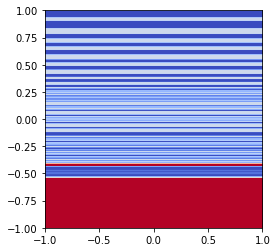

In [189]:
plt.imshow(Fractal, cmap='coolwarm' ,extent=[-1,1,-1,1])